<a href="https://colab.research.google.com/github/MasterMs/991562894_MarcoSiciliano_Multiclass_Classification/blob/main/991562894_MarcoSiciliano_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Last updated: 16 Feb 2023

# 👋 PyCaret Multiclass Classification


# 💻 Installation


In [ ]:
# !pip install pycaret[full]

In [ ]:
# check installed version
import pycaret

pycaret.__version__

'3.3.2'

## **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**

In [ ]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

In [ ]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
import pandas as pd

data = pd.read_csv('/content/winequality-white.csv',sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [ ]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'quality', session_id = 123)

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original data shape,"(4898, 12)"
5,Transformed data shape,"(4898, 12)"
6,Transformed train set shape,"(3428, 12)"
7,Transformed test set shape,"(1470, 12)"
8,Numeric features,11
9,Preprocess,True


In [ ]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [ ]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [ ]:
# init setup on exp
exp.setup(data, target = 'quality', session_id = 123)

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original data shape,"(4898, 12)"
5,Transformed data shape,"(4898, 12)"
6,Transformed train set shape,"(3428, 12)"
7,Transformed test set shape,"(1470, 12)"
8,Numeric features,11
9,Preprocess,True


## Compare Models

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6666,0.3417,0.6666,0.6741,0.6527,0.4778,0.4855,0.9330
et,Extra Trees Classifier,0.6642,0.3423,0.6642,0.6718,0.6509,0.4743,0.4828,0.5900
catboost,CatBoost Classifier,0.6488,0.3315,0.6488,0.6518,0.6387,0.4584,0.4623,14.2820
xgboost,Extreme Gradient Boosting,0.6403,0.3319,0.6403,0.6405,0.6309,0.4484,0.4513,0.8030
lightgbm,Light Gradient Boosting Machine,0.6389,0.3302,0.6389,0.6365,0.6287,0.4447,0.4477,2.8450
gbc,Gradient Boosting Classifier,0.5747,0.0000,0.5747,0.5723,0.5577,0.3312,0.3389,4.6350
dt,Decision Tree Classifier,0.5694,0.2710,0.5694,0.5688,0.5682,0.3630,0.3633,0.0750
lda,Linear Discriminant Analysis,0.5236,0.0000,0.5236,0.5076,0.4988,0.2412,0.2513,0.0400
ridge,Ridge Classifier,0.5216,0.0000,0.5216,0.4512,0.4478,0.1941,0.2216,0.0650
lr,Logistic Regression,0.5128,0.0000,0.5128,0.4676,0.4656,0.1994,0.2145,2.0460


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6666,0.3417,0.6666,0.6741,0.6527,0.4778,0.4855,0.7440
et,Extra Trees Classifier,0.6642,0.3423,0.6642,0.6718,0.6509,0.4743,0.4828,0.6720
catboost,CatBoost Classifier,0.6488,0.3315,0.6488,0.6518,0.6387,0.4584,0.4623,14.3010
xgboost,Extreme Gradient Boosting,0.6403,0.3319,0.6403,0.6405,0.6309,0.4484,0.4513,0.6120
lightgbm,Light Gradient Boosting Machine,0.6389,0.3302,0.6389,0.6365,0.6287,0.4447,0.4477,2.5820
gbc,Gradient Boosting Classifier,0.5747,0.0000,0.5747,0.5723,0.5577,0.3312,0.3389,4.5700
dt,Decision Tree Classifier,0.5694,0.2710,0.5694,0.5688,0.5682,0.3630,0.3633,0.1170
lda,Linear Discriminant Analysis,0.5236,0.0000,0.5236,0.5076,0.4988,0.2412,0.2513,0.0690
ridge,Ridge Classifier,0.5216,0.0000,0.5216,0.4512,0.4478,0.1941,0.2216,0.0390
lr,Logistic Regression,0.5128,0.0000,0.5128,0.4676,0.4656,0.1994,0.2145,0.8790


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

Notice that the output between functional and OOP API is consistent. Rest of the functions in this notebook will only be shown using functional API only.

## Analyze Model

You can use the `plot_model` function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

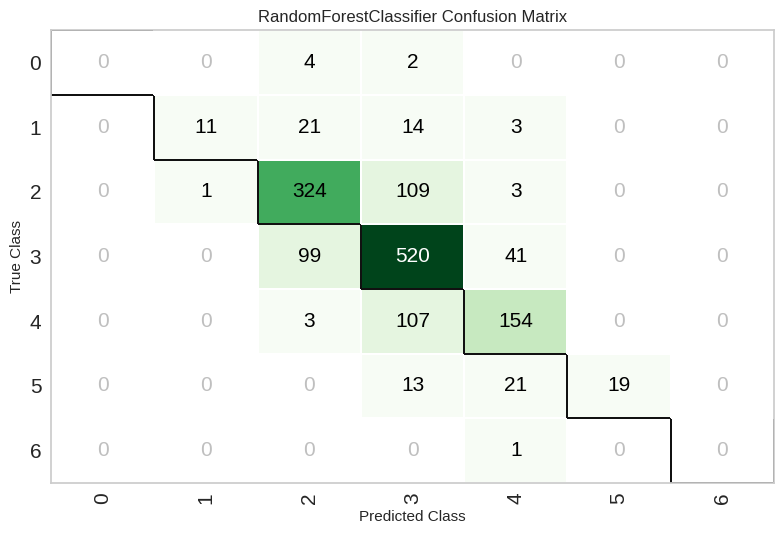

In [ ]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

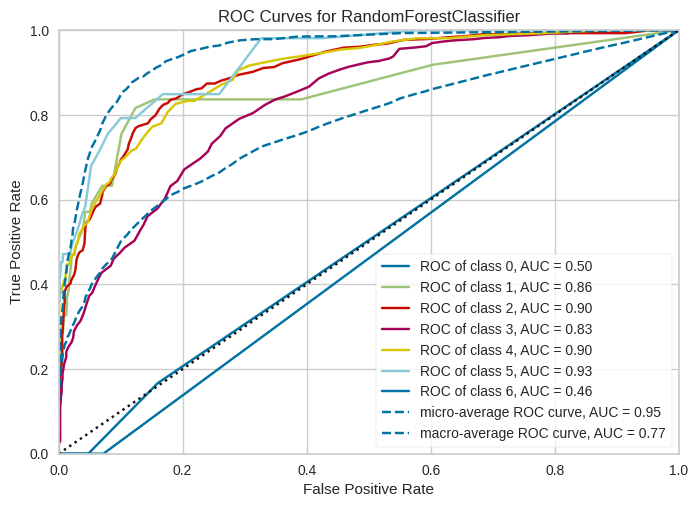

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

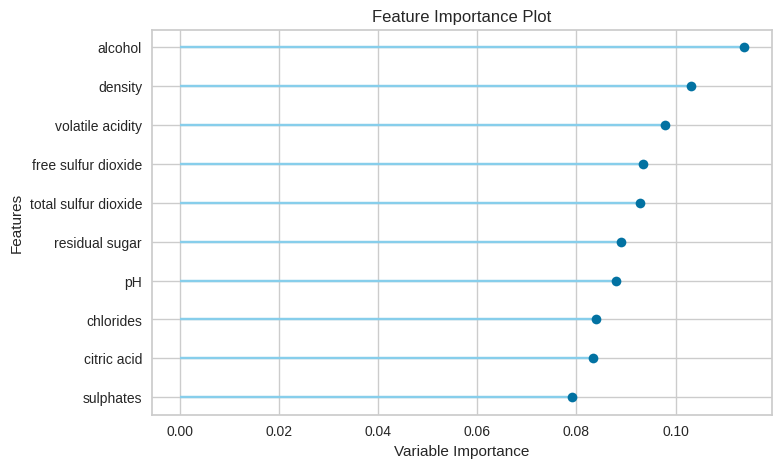

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses ipywidget.

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Prediction
The `predict_model` function returns `prediction_label` and `prediction_score` (probability of the predicted class) as new columns in dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6993,0.8659,0.6993,0.7094,0.6892,0.5354,0.5390


In [ ]:
# show predictions df
holdout_pred.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
139,8.1,0.28,0.39,1.9,0.029,18.0,79.0,0.99230,3.23,0.52,11.8,6,6,0.51
4620,6.4,0.38,0.19,4.5,0.038,36.0,119.0,0.99151,3.07,0.42,11.2,6,6,0.51
1689,7.1,0.16,0.25,1.3,0.034,28.0,123.0,0.99150,3.27,0.55,11.4,6,7,0.42
2724,7.5,0.18,0.31,6.5,0.029,53.0,160.0,0.99276,3.03,0.38,10.9,6,6,0.61
3812,7.9,0.21,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,5,5,0.77


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `Class variable`. We can then use the new data frame without labels for scoring.

In [ ]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('quality', axis=1, inplace=True)
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,prediction_label,prediction_score
0,7.0,0.27,0.36,20.700001,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0.74
1,6.3,0.30,0.34,1.600000,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0.95
2,8.1,0.28,0.40,6.900000,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0.92
3,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.95
4,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.95


## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
               

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH'...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=123, verbose=0,
                                        warm_start=False))],
         verbose=False)

# 👇 Detailed function-by-function overview

1.   List item
2.   List item



## ✅ Setup
This function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: `data` and `target`. All the other parameters are optional and are used for configuring data preprocessing pipeline.

In [ ]:
s = setup(data, target = 'quality', session_id = 123)

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original data shape,"(4898, 12)"
5,Transformed data shape,"(4898, 12)"
6,Transformed train set shape,"(3428, 12)"
7,Transformed test set shape,"(1470, 12)"
8,Numeric features,11
9,Preprocess,True


To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [ ]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:
# lets access X_train_transformed
get_config('X_train_transformed')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2146,7.2,0.115,0.30,6.800000,0.056,26.0,105.0,0.99540,3.44,0.40,9.6
2095,8.4,0.280,0.40,8.900000,0.048,33.0,146.0,0.99880,3.40,0.46,9.3
2671,5.9,0.300,0.30,2.000000,0.030,38.0,142.0,0.98892,3.41,0.41,12.9
875,7.1,0.210,0.32,2.200000,0.037,28.0,141.0,0.99300,3.20,0.57,10.0
3973,6.3,0.270,0.51,7.600000,0.049,35.0,200.0,0.99548,3.16,0.54,9.4
...,...,...,...,...,...,...,...,...,...,...,...
4393,6.4,0.180,0.28,17.049999,0.047,53.0,139.0,0.99724,3.25,0.35,10.5
2151,7.7,0.280,0.35,15.300000,0.056,31.0,117.0,0.99980,3.27,0.50,9.6
1257,6.4,0.170,0.27,6.700000,0.036,88.0,223.0,0.99480,3.28,0.35,10.2
619,7.4,0.190,0.30,1.400000,0.057,33.0,135.0,0.99300,3.12,0.50,9.6


In [ ]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [ ]:
help(setup)

Help on function setup in module pycaret.classification.functional:

setup(data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame, NoneType] = None, data_func: Optional[Callable[[], Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame]]] = None, target: Union[int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = -1, index: Union[bool, int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = True, train_size: float = 0.7, test_data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame, NoneType] = None, ordinal_features: Optional[Dict[str, list]] = None, numeric_features: Optional[List[str]] = None, categorical_features: Optional[List[str]] = None, date_features: Optional[List[str]] = None, text_features: Optional[List[str]] = None, ignore_features: Optional[List[str]] = None, keep_features: Optional[List[str]] = None, prepr

In [ ]:
# init setup with normalize = True

s = setup(data, target = 'quality', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original data shape,"(4898, 12)"
5,Transformed data shape,"(4898, 12)"
6,Transformed train set shape,"(3428, 12)"
7,Transformed test set shape,"(1470, 12)"
8,Numeric features,11
9,Preprocess,True


<Axes: >

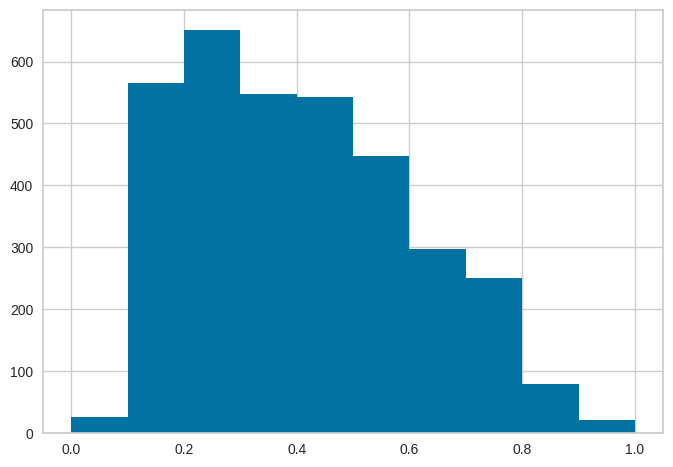

In [ ]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['alcohol'].hist()

<Axes: >

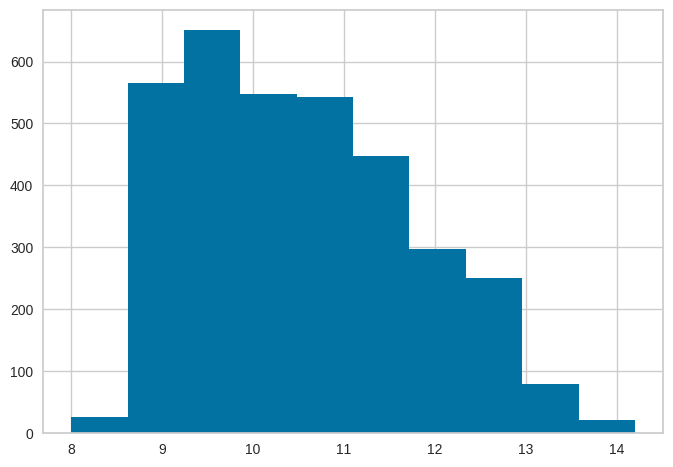

In [ ]:
get_config('X_train')['alcohol'].hist()

## ✅ Comparing Models
This function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6660,0.3416,0.6660,0.6739,0.6522,0.4770,0.4846,0.7490
et,Extra Trees Classifier,0.6642,0.3423,0.6642,0.6713,0.6510,0.4747,0.4830,0.8200
catboost,CatBoost Classifier,0.6488,0.3315,0.6488,0.6518,0.6387,0.4584,0.4623,14.3590
xgboost,Extreme Gradient Boosting,0.6403,0.3319,0.6403,0.6405,0.6309,0.4484,0.4513,0.6130
lightgbm,Light Gradient Boosting Machine,0.6400,0.3308,0.6400,0.6370,0.6294,0.4455,0.4490,3.2750
gbc,Gradient Boosting Classifier,0.5750,0.0000,0.5750,0.5728,0.5581,0.3318,0.3395,4.3970
dt,Decision Tree Classifier,0.5706,0.2706,0.5706,0.5701,0.5694,0.3646,0.3648,0.1080
knn,K Neighbors Classifier,0.5432,0.2871,0.5432,0.5255,0.5287,0.2984,0.3004,0.1210
lr,Logistic Regression,0.5277,0.0000,0.5277,0.4943,0.4778,0.2192,0.2387,0.1220
lda,Linear Discriminant Analysis,0.5239,0.0000,0.5239,0.5079,0.4991,0.2416,0.2518,0.0450


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [ ]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [ ]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbc', 'xgboost', 'lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6660,0.3416,0.6660,0.6739,0.6522,0.4770,0.4846,0.9680
et,Extra Trees Classifier,0.6642,0.3423,0.6642,0.6713,0.6510,0.4747,0.4830,0.5320
xgboost,Extreme Gradient Boosting,0.6403,0.3319,0.6403,0.6405,0.6309,0.4484,0.4513,0.7250
lightgbm,Light Gradient Boosting Machine,0.6400,0.3308,0.6400,0.6370,0.6294,0.4455,0.4490,2.8210
gbc,Gradient Boosting Classifier,0.5750,0.0000,0.5750,0.5728,0.5581,0.3318,0.3395,4.6430
dt,Decision Tree Classifier,0.5706,0.2706,0.5706,0.5701,0.5694,0.3646,0.3648,0.0750


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

In [ ]:
compare_tree_models

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [ ]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6660,0.3416,0.6660,0.6739,0.6522,0.4770,0.4846,0.968
et,Extra Trees Classifier,0.6642,0.3423,0.6642,0.6713,0.6510,0.4747,0.4830,0.532
xgboost,Extreme Gradient Boosting,0.6403,0.3319,0.6403,0.6405,0.6309,0.4484,0.4513,0.725
lightgbm,Light Gradient Boosting Machine,0.6400,0.3308,0.6400,0.6370,0.6294,0.4455,0.4490,2.821
gbc,Gradient Boosting Classifier,0.5750,0.0000,0.5750,0.5728,0.5581,0.3318,0.3395,4.643
dt,Decision Tree Classifier,0.5706,0.2706,0.5706,0.5701,0.5694,0.3646,0.3648,0.075


By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `Recall`.

In [ ]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6660,0.3416,0.6660,0.6739,0.6522,0.4770,0.4846,0.8850
et,Extra Trees Classifier,0.6642,0.3423,0.6642,0.6713,0.6510,0.4747,0.4830,0.6000
catboost,CatBoost Classifier,0.6488,0.3315,0.6488,0.6518,0.6387,0.4584,0.4623,14.0160
xgboost,Extreme Gradient Boosting,0.6403,0.3319,0.6403,0.6405,0.6309,0.4484,0.4513,0.8050
lightgbm,Light Gradient Boosting Machine,0.6400,0.3308,0.6400,0.6370,0.6294,0.4455,0.4490,3.5170
gbc,Gradient Boosting Classifier,0.5750,0.0000,0.5750,0.5728,0.5581,0.3318,0.3395,4.5610
dt,Decision Tree Classifier,0.5706,0.2706,0.5706,0.5701,0.5694,0.3646,0.3648,0.0680
knn,K Neighbors Classifier,0.5432,0.2871,0.5432,0.5255,0.5287,0.2984,0.3004,0.0970
lr,Logistic Regression,0.5277,0.0000,0.5277,0.4943,0.4778,0.2192,0.2387,0.1220
lda,Linear Discriminant Analysis,0.5239,0.0000,0.5239,0.5079,0.4991,0.2416,0.2518,0.0450


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [ ]:
# list of top 3 models by Recall
best_recall_models_top3

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, n_estimators=100, n_jobs=-1,
                        oob_score=False, random_state=123, verbose=0,
                        warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, n_estimators=100, n_jobs=-1,
                      oob_sc

Some other parameters that you might find very useful in `compare_models` are:

- fold
- cross_validation
- budget_time
- errors
- probability_threshold
- parallel

You can check the docstring of the function for more info.

In [ ]:
help(compare_models)

Help on function compare_models in module pycaret.classification.functional:

compare_models(include: Optional[List[Union[str, Any]]] = None, exclude: Optional[List[str]] = None, fold: Union[int, Any, NoneType] = None, round: int = 4, cross_validation: bool = True, sort: str = 'Accuracy', n_select: int = 1, budget_time: Optional[float] = None, turbo: bool = True, errors: str = 'ignore', fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, experiment_custom_tags: Optional[Dict[str, Any]] = None, probability_threshold: Optional[float] = None, engine: Optional[Dict[str, str]] = None, verbose: bool = True, parallel: Optional[pycaret.internal.parallel.parallel_backend.ParallelBackend] = None) -> Union[Any, List[Any]]
    This function trains and evaluates performance of all estimators available in the
    model library using cross validation. The output of this function is a score grid
    with average cross validated scores. Metrics evaluated during CV can be access

## ✅ Experiment Logging
PyCaret integrates with many different type of experiment loggers (default = 'mlflow'). To turn on experiment tracking in PyCaret you can set `log_experiment` and `experiment_name` parameter. It will automatically track all the metrics, hyperparameters, and artifacts based on the defined logger.

In [ ]:
# from pycaret.classification import *
# s = setup(data, target = 'Class variable', log_experiment='mlflow', experiment_name='iris_experiment')

In [ ]:
# compare models
# best = compare_models()

In [ ]:
# start mlflow server on localhost:5000
# !mlflow ui

By default PyCaret uses `MLFlow` logger that can be changed using `log_experiment` parameter. Following loggers are available:
    
    - mlflow
    - wandb
    - comet_ml
    - dagshub
    
Other logging related parameters that you may find useful are:

- experiment_custom_tags
- log_plots
- log_data
- log_profile

For more information check out the docstring of the `setup` function.

In [ ]:
# help(setup)

## ✅ Create Model
This function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the models function.

In [ ]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
# train logistic regression with default fold=10
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5277,0.0000,0.5277,0.5207,0.4810,0.2202,0.2392
1,0.5335,0.0000,0.5335,0.5026,0.4904,0.2346,0.2507
2,0.5335,0.0000,0.5335,0.4818,0.4729,0.2212,0.2470
3,0.5160,0.0000,0.5160,0.4761,0.4649,0.2003,0.2170
4,0.5539,0.0000,0.5539,0.5286,0.5002,0.2571,0.2848
5,0.5248,0.0000,0.5248,0.4766,0.4704,0.2131,0.2323
6,0.5131,0.0000,0.5131,0.4821,0.4573,0.1855,0.2087
7,0.5423,0.0000,0.5423,0.5140,0.4986,0.2476,0.2657
8,0.5234,0.0000,0.5234,0.4898,0.4853,0.2260,0.2377


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [ ]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5277,0.0,0.5277,0.5207,0.4810,0.2202,0.2392
1,0.5335,0.0,0.5335,0.5026,0.4904,0.2346,0.2507
2,0.5335,0.0,0.5335,0.4818,0.4729,0.2212,0.2470
3,0.5160,0.0,0.5160,0.4761,0.4649,0.2003,0.2170
4,0.5539,0.0,0.5539,0.5286,0.5002,0.2571,0.2848
5,0.5248,0.0,0.5248,0.4766,0.4704,0.2131,0.2323
6,0.5131,0.0,0.5131,0.4821,0.4573,0.1855,0.2087
7,0.5423,0.0,0.5423,0.5140,0.4986,0.2476,0.2657
8,0.5234,0.0,0.5234,0.4898,0.4853,0.2260,0.2377


In [ ]:
# train logistic regression with fold=3
lr = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5381,0.0000,0.5381,0.5345,0.4891,0.2366,0.2574
1,0.5337,0.0000,0.5337,0.4964,0.4822,0.2264,0.2486
2,0.5219,0.0000,0.5219,0.4919,0.4718,0.2104,0.2280
Mean,0.5312,0.0000,0.5312,0.5076,0.4810,0.2245,0.2447
Std,0.0068,0.0000,0.0068,0.0191,0.0071,0.0108,0.0123


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# train logistic regression with specific model parameters
create_model('lr', C = 0.5, l1_ratio = 0.15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5160,0.0000,0.5160,0.4826,0.4626,0.1931,0.2148
1,0.5452,0.0000,0.5452,0.5253,0.4996,0.2503,0.2700
2,0.5423,0.0000,0.5423,0.4867,0.4732,0.2314,0.2621
3,0.5190,0.0000,0.5190,0.4562,0.4552,0.1995,0.2195
4,0.5452,0.0000,0.5452,0.5231,0.4881,0.2394,0.2683
5,0.5335,0.0000,0.5335,0.4907,0.4728,0.2229,0.2464
6,0.5102,0.0000,0.5102,0.4828,0.4480,0.1751,0.2010
7,0.5452,0.0000,0.5452,0.5099,0.4946,0.2473,0.2694
8,0.5292,0.0000,0.5292,0.4956,0.4863,0.2322,0.2459


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.15, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Some other parameters that you might find very useful in `create_model` are:

- cross_validation
- engine
- fit_kwargs
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(create_model)

## ✅ Tune Model

This function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# train a dt model with default params
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.0000,0.5714,0.5741,0.5726,0.3652,0.3653
1,0.5685,0.0000,0.5685,0.5726,0.5700,0.3663,0.3665
2,0.5423,0.0000,0.5423,0.5391,0.5397,0.3159,0.3163
3,0.5948,0.0000,0.5948,0.5814,0.5857,0.3931,0.3935
4,0.6064,0.7079,0.6064,0.6072,0.6064,0.4171,0.4173
5,0.5831,0.6858,0.5831,0.5837,0.5830,0.3836,0.3838
6,0.5160,0.6344,0.5160,0.5142,0.5137,0.2849,0.2853
7,0.5714,0.6784,0.5714,0.5684,0.5687,0.3640,0.3643
8,0.5702,0.0000,0.5702,0.5736,0.5713,0.3676,0.3678


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5190,0.0000,0.5190,0.4781,0.4775,0.2237,0.2355
1,0.5219,0.0000,0.5219,0.4960,0.5008,0.2464,0.2513
2,0.5306,0.0000,0.5306,0.5252,0.4811,0.2251,0.2454
3,0.5131,0.0000,0.5131,0.4893,0.4732,0.2191,0.2282
4,0.5364,0.7190,0.5364,0.5189,0.5186,0.2738,0.2784
5,0.5423,0.7178,0.5423,0.5139,0.5089,0.2708,0.2786
6,0.5160,0.6918,0.5160,0.4883,0.4724,0.2070,0.2225
7,0.5394,0.6964,0.5394,0.5116,0.5036,0.2600,0.2710
8,0.5322,0.0000,0.5322,0.5336,0.5084,0.2690,0.2734


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter.

In [ ]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [ ]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = F1
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.0000,0.5714,0.5741,0.5726,0.3652,0.3653
1,0.5685,0.0000,0.5685,0.5726,0.5700,0.3663,0.3665
2,0.5423,0.0000,0.5423,0.5391,0.5397,0.3159,0.3163
3,0.5948,0.0000,0.5948,0.5814,0.5857,0.3931,0.3935
4,0.6064,0.7079,0.6064,0.6072,0.6064,0.4171,0.4173
5,0.5831,0.6858,0.5831,0.5837,0.5830,0.3836,0.3838
6,0.5160,0.6344,0.5160,0.5142,0.5137,0.2849,0.2853
7,0.5714,0.6784,0.5714,0.5684,0.5687,0.3640,0.3643
8,0.5702,0.0000,0.5702,0.5736,0.5713,0.3676,0.3678


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5190,0.0000,0.5190,0.4781,0.4775,0.2237,0.2355
1,0.5219,0.0000,0.5219,0.4960,0.5008,0.2464,0.2513
2,0.5306,0.0000,0.5306,0.5252,0.4811,0.2251,0.2454
3,0.5131,0.0000,0.5131,0.4893,0.4732,0.2191,0.2282
4,0.5364,0.7190,0.5364,0.5189,0.5186,0.2738,0.2784
5,0.5423,0.7178,0.5423,0.5139,0.5089,0.2708,0.2786
6,0.5160,0.6918,0.5160,0.4883,0.4724,0.2070,0.2225
7,0.5394,0.6964,0.5394,0.5116,0.5036,0.2600,0.2710
8,0.5322,0.0000,0.5322,0.5336,0.5084,0.2690,0.2734


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# model object
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [ ]:
# tuner object
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('label_encoding',
                                              TransformerWrapperWithInverse(exclude=None,
                                                                            include=None,
                                                                            transformer=LabelEncoder())),
                                             ('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['fixed '
                                                                          'acidity',
                                                                          'volatile '
                                                                          'aci...
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False, scoring='accuracy', verbose=1)

The default search algorithm is `RandomizedSearchCV` from `sklearn`. This can be changed by using `search_library` and `search_algorithm` parameter.

In [ ]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5306,0.0000,0.5306,0.5332,0.5310,0.3033,0.3036
1,0.5714,0.0000,0.5714,0.5568,0.5631,0.3534,0.3537
2,0.5190,0.0000,0.5190,0.5082,0.4996,0.2421,0.2475
3,0.5394,0.0000,0.5394,0.5205,0.5295,0.3028,0.3033
4,0.5190,0.6993,0.5190,0.5090,0.5128,0.2776,0.2778
5,0.5510,0.7205,0.5510,0.5428,0.5457,0.3231,0.3237
6,0.5277,0.6851,0.5277,0.5157,0.5200,0.2809,0.2819
7,0.5160,0.7246,0.5160,0.5117,0.5105,0.2787,0.2791
8,0.5409,0.0000,0.5409,0.5266,0.5293,0.2965,0.2983


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 3428 samples...
INFO:optuna_integration.sklearn.sklearn:Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


For more details on all available `search_library` and `search_algorithm` please check the docstring. Some other parameters that you might find very useful in `tune_model` are:

- choose_better
- n_iter
- early_stopping
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(tune_model)

## ✅ Ensemble Model

This function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6122,0.0000,0.6122,0.6080,0.6063,0.4094,0.4113
1,0.6152,0.0000,0.6152,0.6146,0.6086,0.4138,0.4151
2,0.6122,0.0000,0.6122,0.5941,0.5903,0.3876,0.3961
3,0.6210,0.0000,0.6210,0.6284,0.6050,0.4207,0.4227
4,0.6152,0.7982,0.6152,0.6070,0.5959,0.4061,0.4084
5,0.6414,0.8035,0.6414,0.6430,0.6330,0.4462,0.4499
6,0.6006,0.7833,0.6006,0.5944,0.5917,0.3900,0.3918
7,0.5889,0.8057,0.5889,0.5818,0.5826,0.3761,0.3773
8,0.6579,0.0000,0.6579,0.6774,0.6473,0.4671,0.4729


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [ ]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5510,0.0000,0.5510,0.5535,0.5510,0.3399,0.3402
1,0.5743,0.0000,0.5743,0.5747,0.5741,0.3724,0.3726
2,0.5481,0.0000,0.5481,0.5397,0.5422,0.3192,0.3203
3,0.5889,0.0000,0.5889,0.5771,0.5816,0.3874,0.3877
4,0.6297,0.0000,0.6297,0.6262,0.6270,0.4473,0.4475
5,0.5831,0.0000,0.5831,0.5807,0.5810,0.3776,0.3779
6,0.5335,0.0000,0.5335,0.5291,0.5306,0.3057,0.3059
7,0.5802,0.0000,0.5802,0.5792,0.5795,0.3817,0.3818
8,0.5877,0.0000,0.5877,0.5894,0.5879,0.3936,0.3937


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    monotonic_cst=None,
                                                    random_state=123,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=123)

Some other parameters that you might find very useful in `ensemble_model` are:

- choose_better
- n_estimators
- groups
- fit_kwargs
- probability_threshold
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(ensemble_model)

## ✅ Blend Models

This function trains a Soft Voting / Majority Rule classifier for select models passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# top 3 models based on recall
best_recall_models_top3

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, n_estimators=100, n_jobs=-1,
                        oob_score=False, random_state=123, verbose=0,
                        warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, n_estimators=100, n_jobs=-1,
                      oob_sc

In [ ]:
# blend top 3 models
blend_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6822,0.0000,0.6822,0.6859,0.6745,0.5068,0.5128
1,0.6764,0.0000,0.6764,0.6796,0.6692,0.5002,0.5045
2,0.6210,0.0000,0.6210,0.6276,0.6071,0.4030,0.4114
3,0.6647,0.0000,0.6647,0.6750,0.6490,0.4800,0.4836
4,0.6793,0.8717,0.6793,0.6965,0.6620,0.4977,0.5045
5,0.6997,0.8684,0.6997,0.7147,0.6879,0.5291,0.5394
6,0.6589,0.8402,0.6589,0.6718,0.6443,0.4688,0.4745
7,0.6531,0.8551,0.6531,0.6502,0.6452,0.4657,0.4691
8,0.6667,0.0000,0.6667,0.6766,0.6567,0.4809,0.4874


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingClassifier(estimators=[('Random Forest Classifier',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     monotonic_cst=None,
                                                     n_estimators=100,
                                                     n_jobs...
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   n_estimators=100, n_jobs=-1,
                                                   oob_score=False,
                                                   random_state=123, verbose=0,
                                                   warm_start=False)),
                             ('CatBoost Classifier',
                              <catboost.core.CatBoostClassifier object at 0x7e7d5b032bf0>)],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

Some other parameters that you might find very useful in `blend_models` are:

- choose_better
- method
- weights
- fit_kwargs
- probability_threshold
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
help(blend_models)

Help on function blend_models in module pycaret.classification.functional:

blend_models(estimator_list: list, fold: Union[int, Any, NoneType] = None, round: int = 4, choose_better: bool = False, optimize: str = 'Accuracy', method: str = 'auto', weights: Optional[List[float]] = None, fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, probability_threshold: Optional[float] = None, verbose: bool = True, return_train_score: bool = False) -> Any
    This function trains a Soft Voting / Majority Rule classifier for select
    models passed in the ``estimator_list`` param. The output of this function
    is a score grid with CV scores by fold. Metrics evaluated during CV can be
    accessed using the ``get_metrics`` function. Custom metrics can be added
    or removed using ``add_metric`` and ``remove_metric`` function.
    
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classificatio

## ✅ Stack Models

This function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# stack models
stack_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6560,0.0000,0.6560,0.6547,0.6466,0.4678,0.4718
1,0.6851,0.0000,0.6851,0.6950,0.6775,0.5152,0.5182
2,0.6414,0.0000,0.6414,0.6388,0.6248,0.4369,0.4444
3,0.6910,0.0000,0.6910,0.6988,0.6742,0.5209,0.5247
4,0.7085,0.0000,0.7085,0.7236,0.6901,0.5436,0.5510
5,0.7085,0.0000,0.7085,0.7322,0.6974,0.5403,0.5553
6,0.6356,0.0000,0.6356,0.6489,0.6225,0.4347,0.4387
7,0.6793,0.0000,0.6793,0.6751,0.6703,0.5069,0.5105
8,0.6725,0.0000,0.6725,0.6824,0.6623,0.4902,0.4972


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingClassifier(cv=5,
                   estimators=[('Random Forest Classifier',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       monotonic_cst=None,
                                                       n_estimators=100...
                                <catboost.core.CatBoostClassifier object at 0x7e7d5b050b50>)],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=False, stack_method='auto',
                   verbose=0)

Some other parameters that you might find very useful in `stack_models` are:

- choose_better
- meta_model
- method
- restack
- probability_threshold
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
help(stack_models)

Help on function stack_models in module pycaret.classification.functional:

stack_models(estimator_list: list, meta_model=None, meta_model_fold: Union[int, Any, NoneType] = 5, fold: Union[int, Any, NoneType] = None, round: int = 4, method: str = 'auto', restack: bool = False, choose_better: bool = False, optimize: str = 'Accuracy', fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, probability_threshold: Optional[float] = None, verbose: bool = True, return_train_score: bool = False) -> Any
    This function trains a meta model over select estimators passed in
    the ``estimator_list`` parameter. The output of this function is a
    score grid with CV scores by fold. Metrics evaluated during CV can
    be accessed using the ``get_metrics`` function. Custom metrics
    can be added or removed using ``add_metric`` and ``remove_metric``
    function.
    
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')


## ✅ Plot Model

This function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

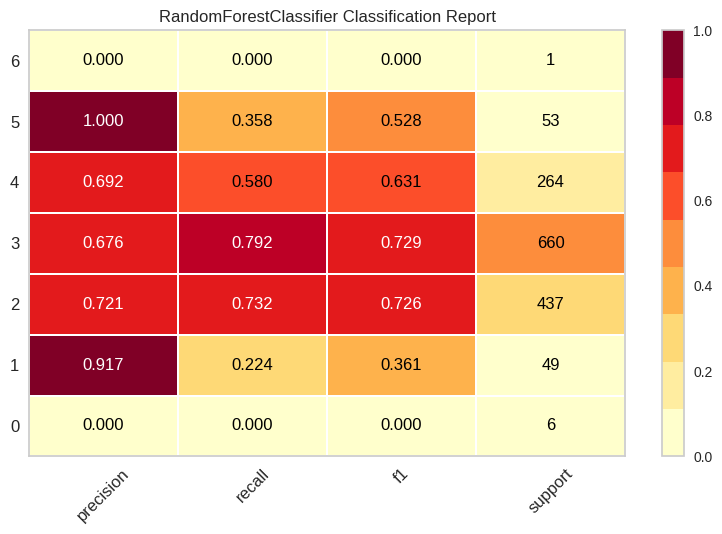

In [ ]:
# plot class report
plot_model(best, plot = 'class_report')

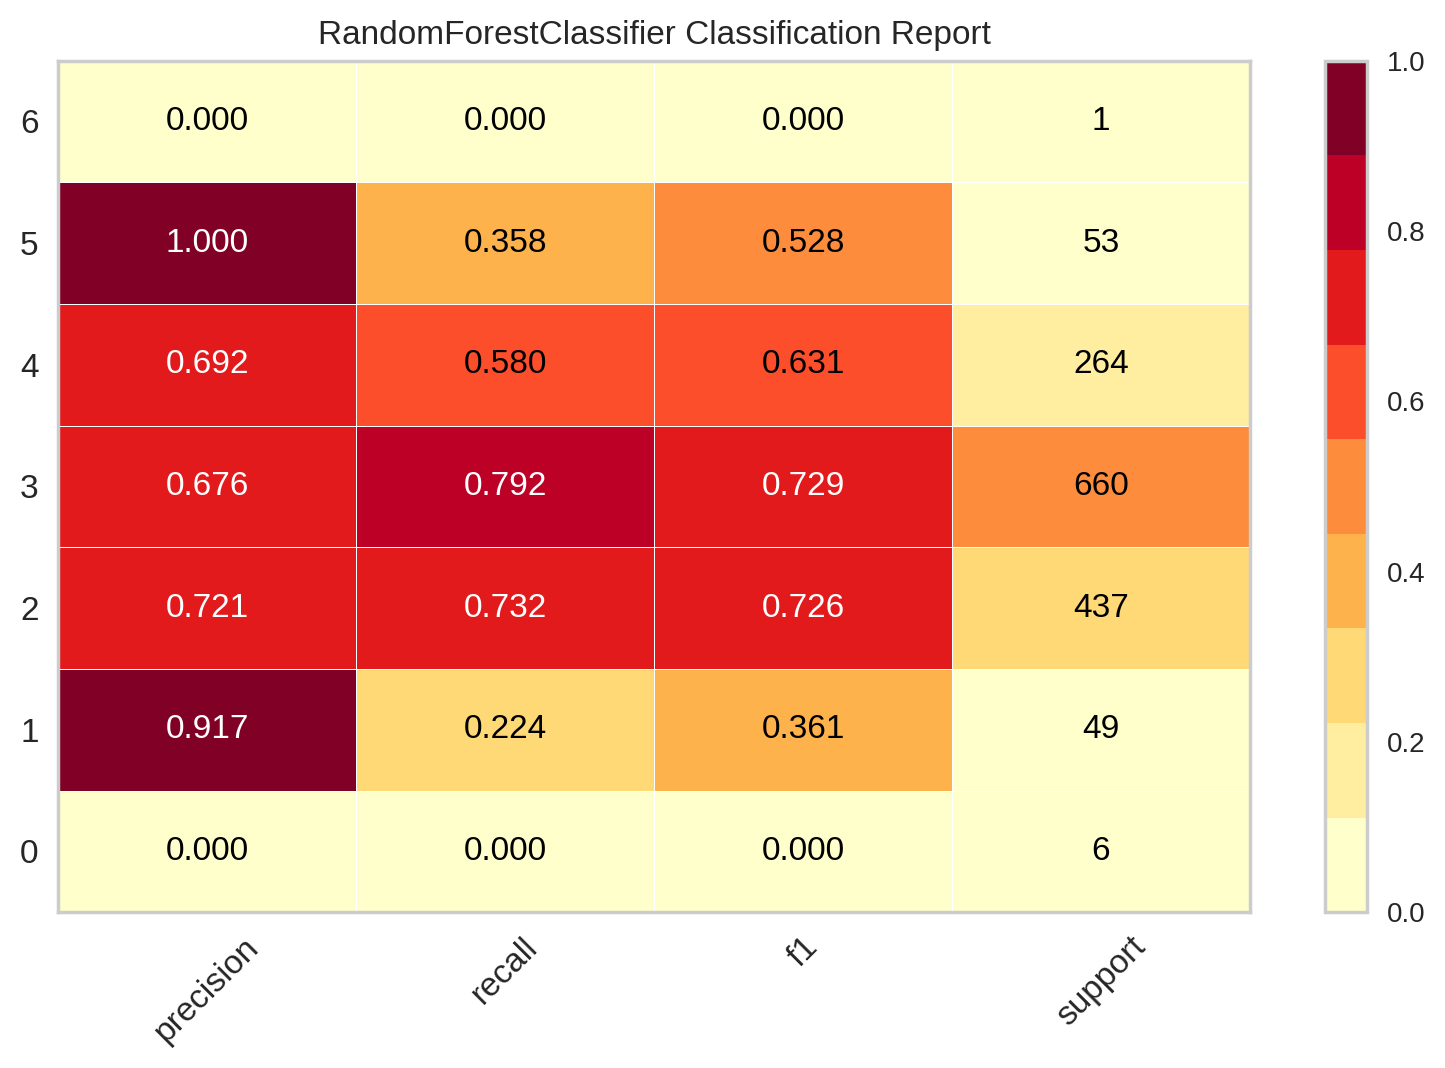

In [ ]:
# to control the scale of plot
plot_model(best, plot = 'class_report', scale = 2)

In [ ]:
# to save the plot
plot_model(best, plot = 'class_report', save=True)

'Class Report.png'

Some other parameters that you might find very useful in `plot_model` are:

- fit_kwargs
- plot_kwargs
- groups
- display_format

You can check the docstring of the function for more info.

In [ ]:
# help(plot_model)

## ✅ Interpret Model

This function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

In [ ]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6268,0.0000,0.6268,0.6234,0.6187,0.4243,0.4291
1,0.6268,0.0000,0.6268,0.6248,0.6216,0.4302,0.4317
2,0.6181,0.0000,0.6181,0.6090,0.6039,0.4051,0.4101
3,0.6589,0.0000,0.6589,0.6624,0.6443,0.4758,0.4779
4,0.6531,0.8468,0.6531,0.6440,0.6359,0.4635,0.4666
5,0.6764,0.8278,0.6764,0.6812,0.6690,0.5002,0.5061
6,0.6472,0.8135,0.6472,0.6430,0.6340,0.4547,0.4596
7,0.6210,0.8197,0.6210,0.6136,0.6145,0.4232,0.4248
8,0.6345,0.0000,0.6345,0.6484,0.6302,0.4407,0.4428


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

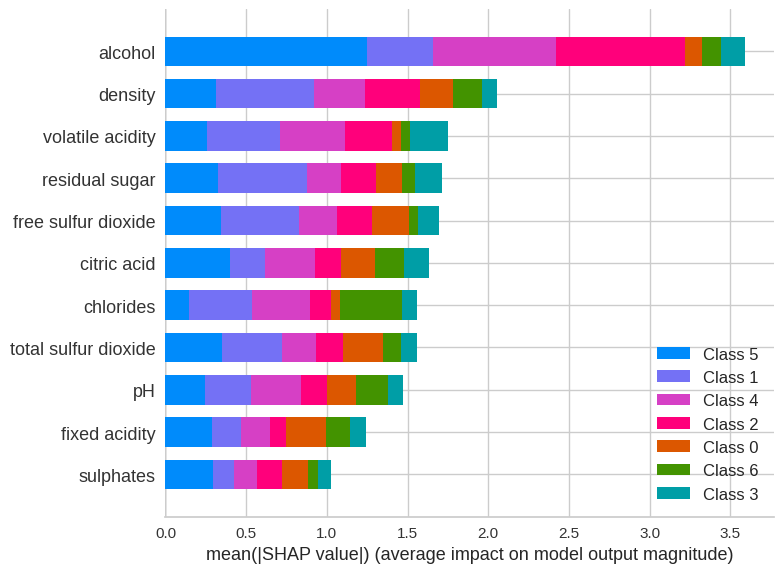

In [ ]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [ ]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

Some other parameters that you might find very useful in `interpret_model` are:

- plot
- feature
- use_train_data
- X_new_sample
- y_new_sample
- save

You can check the docstring of the function for more info.

In [ ]:
# help(interpret_model)

## ✅ Get Leaderboard

This function returns the leaderboard of all models trained in the current setup.

In [ ]:
# get leaderboard
lb = get_leaderboard()
lb

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:54:22
Status,. . . . . . . . . . . . . . . . . .,Collecting models
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


Processing:   0%|          | 0/57 [00:00<?, ?it/s]

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapperWithInverse(exclude=None, i...",0.5277,0.0000,0.5277,0.4943,0.4778,0.2192,0.2387
1,K Neighbors Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5432,0.2871,0.5432,0.5255,0.5287,0.2984,0.3004
2,Naive Bayes,"(TransformerWrapperWithInverse(exclude=None, i...",0.4341,0.2681,0.4341,0.4641,0.4253,0.2081,0.2175
3,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5706,0.2706,0.5706,0.5701,0.5694,0.3646,0.3648
4,SVM - Linear Kernel,"(TransformerWrapperWithInverse(exclude=None, i...",0.4944,0.0000,0.4944,0.3989,0.4206,0.1678,0.1911
5,Ridge Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5216,0.0000,0.5216,0.4644,0.4477,0.1940,0.2217
6,Random Forest Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.6660,0.3416,0.6660,0.6739,0.6522,0.4770,0.4846
7,Quadratic Discriminant Analysis,"(TransformerWrapperWithInverse(exclude=None, i...",0.4685,0.0000,0.4685,0.4890,0.4567,0.2509,0.2619
8,Ada Boost Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.4300,0.0000,0.4300,0.3611,0.3685,0.0977,0.1115


In [ ]:
# select the best model based on F1
lb.sort_values(by='F1', ascending=False)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates...
                                                 <catboost.core.CatBoostClassifier object at 0x7e7ca1952e30>)],
                                    final_estimator=LogisticRegression(C=1.0,
                                                                       class_weight=None,
                                                                       dual=False,
                                                                       fit_intercept=True,
                                                                       intercept_scaling=1,
                                                                       l1_ratio=None,
                                                                       max_iter=1000,
                                                                       multi_class='auto',
                                                                       n_jobs=None,
                                                                       penalty='l2',
                                                                       random_state=123,
                                                                       solver='lbfgs',
                                                                       tol=0.0001,
                                                                       verbose=0,
                                                                       warm_start=False),
                                    n_jobs=-1, passthrough=False,
                                    stack_method='auto', verbose=0)]],
         verbose=False)

Some other parameters that you might find very useful in `get_leaderboard` are:

- finalize_models
- fit_kwargs
- model_only
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(get_leaderboard)

## ✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [ ]:
automl()



StackingClassifier(cv=5,
                   estimators=[('Random Forest Classifier',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       monotonic_cst=None,
                                                       n_estimators=100...
                                <catboost.core.CatBoostClassifier object at 0x7e7ca19083d0>)],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=False, stack_method='auto',
                   verbose=0)

In [ ]:
get_metrics()

## ✅ Dashboard
The dashboard function generates the interactive dashboard for a trained model. The dashboard is implemented using `ExplainerDashboard`. For more information check out [Explainer Dashboard.](explainerdashboard.readthedocs.io)

In [ ]:
# dashboard function
dashboard(dt, display_format ='inline')

## ✅ Create API
This function takes an input model and creates a POST API for inference.

In [139]:
# create api
create_api(best, api_name = 'my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


In [140]:
!python my_first_api.py

Transformation Pipeline and Model Successfully Loaded
Traceback (most recent call last):
  File "/content/my_first_api.py", line 16, in <module>
    input_model = create_model("my_first_api_input", **{'fixed acidity': 7.199999809265137, 'volatile acidity': 0.11500000208616257, 'citric acid': 0.30000001192092896, 'residual sugar': 6.800000190734863, 'chlorides': 0.0560000017285347, 'free sulfur dioxide': 26.0, 'total sulfur dioxide': 105.0, 'density': 0.9954000115394592, 'pH': 3.440000057220459, 'sulphates': 0.4000000059604645, 'alcohol': 9.600000381469727})
  File "/usr/local/lib/python3.10/dist-packages/pydantic/main.py", line 1600, in create_model
    return meta(
  File "/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_model_construction.py", line 115, in __new__
    private_attributes = inspect_namespace(
  File "/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_model_construction.py", line 428, in inspect_namespace
    raise PydanticUserError(
pydantic.errors.

In [141]:
# check out the .py file created with this magic command
%load my_first_api.py

## ✅ Create Docker
This function creates a `Dockerfile` and `requirements.txt` for productionalizing API end-point.

In [142]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [149]:
# check out the DockerFile file created with this magic command
%load my_first_api

In [145]:
# check out the requirements file created with this magic command
%load requirements.txt

## ✅ Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [150]:
final_best = finalize_model(best)

In [151]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=123, verbose=0,
                                        warm_start=False))],
         verbose=False)

## ✅ Convert Model
This function transpiles the trained machine learning model's decision function in different programming languages such as Python, C, Java, Go, C#, etc. It is very useful if you want to deploy models into environments where you can't install your normal Python stack to support model inference.

In [157]:
# transpiles learned function to java
print(convert_model(dt, language = 'python'))

def score(input):
    if input[10] <= 0.34139788150787354:
        if input[1] <= 0.2034313678741455:
            if input[1] <= 0.14215686917304993:
                if input[10] <= 0.12096774578094482:
                    if input[8] <= 0.2018347978591919:
                        var0 = [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
                    else:
                        if input[4] <= 0.1212574914097786:
                            if input[9] <= 0.26582279801368713:
                                if input[0] <= 0.2788461744785309:
                                    if input[0] <= 0.16826923191547394:
                                        var0 = [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
                                    else:
                                        var0 = [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
                                else:
                                    var0 = [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
                            else:
                            

## ✅ Deploy Model
This function deploys the entire ML pipeline on the cloud.

**AWS:**  When deploying model on AWS S3, environment variables must be configured using the command-line interface. To configure AWS environment variables, type `aws configure` in terminal. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:

- AWS Access Key ID
- AWS Secret Key Access
- Default Region Name (can be seen under Global settings on your AWS console)
- Default output format (must be left blank)

**GCP:** To deploy a model on Google Cloud Platform ('gcp'), the project must be created using the command-line or GCP console. Once the project is created, you must create a service account and download the service account key as a JSON file to set environment variables in your local environment. Learn more about it: https://cloud.google.com/docs/authentication/production

**Azure:** To deploy a model on Microsoft Azure ('azure'), environment variables for the connection string must be set in your local environment. Go to settings of storage account on Azure portal to access the connection string required.
AZURE_STORAGE_CONNECTION_STRING (required as environment variable)
Learn more about it: https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?toc=%2Fpython%2Fazure%2FTOC.json

In [159]:
from google.colab import userdata
import boto3

boto3.setup_default_session(
  aws_access_key_id=userdata.get('AWS_ACCESS_KEY_ID'),
  aws_secret_access_key=userdata.get('AWS_SECRET_ACCESS_KEY'),
  region_name=userdata.get('AWS_DEFAULT_REGION')
)

bucket = boto3.resource('s3').Bucket('pycaret-test-2894s')
bucket.upload_file('my_first_api.py', 'my_first_api.py')



S3UploadFailedError: Failed to upload my_first_api.py to pycaret-test-2894s/my_first_api.py: An error occurred (InvalidAccessKeyId) when calling the PutObject operation: The AWS Access Key Id you provided does not exist in our records.

In [161]:
# deploy model on aws s3
deploy_model(best, model_name = 'my_first_platform_on_aws', platform = 'aws', authentication = {'bucket' : 'pycaret-test-2894s'})


S3UploadFailedError: Failed to upload my_first_platform_on_aws.pkl to pycaret-test-2894s/my_first_platform_on_aws.pkl: An error occurred (InvalidAccessKeyId) when calling the CreateMultipartUpload operation: The AWS Access Key Id you provided does not exist in our records.

In [137]:
# load model from aws s3
loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

loaded_from_aws

ClientError: An error occurred (403) when calling the HeadObject operation: Forbidden

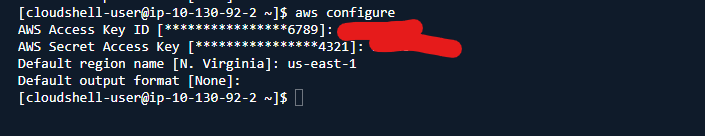

## ✅ Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [127]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
               

In [128]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH'...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=123, verbose=0,
                                        warm_start=False))],
         verbose=False)

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [125]:
# save experiment
save_experiment('my_experiment')

In [126]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original data shape,"(4898, 12)"
5,Transformed data shape,"(4898, 12)"
6,Transformed train set shape,"(3428, 12)"
7,Transformed test set shape,"(1470, 12)"
8,Numeric features,11
9,Preprocess,True
